# Import basic libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Machine_Learning_Projects/Breast cancer prediction data set.csv')

# Preprocessing 

In [ ]:
# To get first five records
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# To get number of Rows & Columns
df.shape

(569, 33)

In [ ]:
# To get properties of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

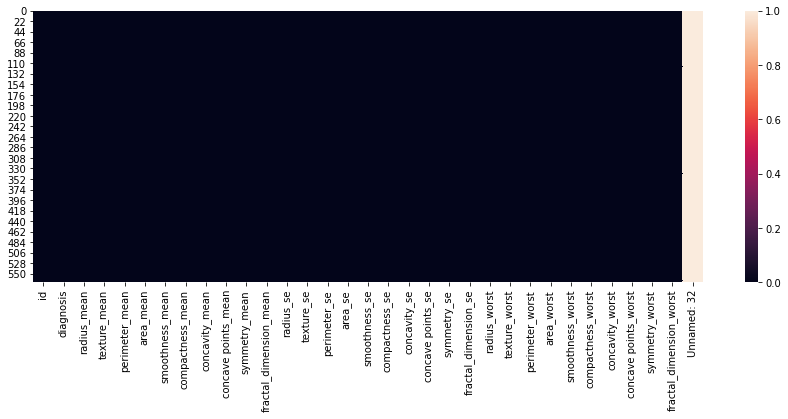

In [ ]:
# Visulization of null values by using Heatmap
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull())
plt.show()

In [ ]:
# Null values in %
df.isnull().sum()/df.shape[0]*100

id                           0.0
diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst         0.0
symmetry_w

In [ ]:
# Machine only knows numerical figures.
# In this dataset we have categorical("strings") values also.
# so we need to convert them into numerical values.
# For convertion form categorical values to Numerical values we need to have segrigate such values and put into 
# diffrent diffrent data frames.
df_cat=df.select_dtypes('object') 
df_num=df.select_dtypes(['int64','float64']) 

In [ ]:
# Convertion of categorical values to Numerical values.
# we have two methods for such process:
# 1] LabelEncoder
# 2] One Hot Encoder
# Here we will used LabelEncoder
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
le=LabelEncoder()
for col in df_cat:
  df_cat[col]=le.fit_transform(df_cat[col])

In [ ]:
# check LabelEncoder method applicable or not
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   diagnosis  569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [ ]:
# Crete new data frame by concating categorical & numerical dataframe
new_df=pd.concat([df_num,df_cat],axis=1)

In [ ]:
# Check new data frame
new_df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


In [ ]:
# Drop unwanted Column
#new_df.drop(['id'],axis=1,inplace=True) 
new_df.drop(['Unnamed: 32'],axis=1,inplace=True)

In [ ]:
# check Unwanted column drop or not
new_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
new_df.shape

(569, 31)

# Split data into X & Y

In [ ]:
x=new_df.drop('diagnosis',axis=1)
y=new_df['diagnosis']

#  Divide data for train(80%) & Test(20%)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

# Scalling input data

In [ ]:
# There are two types of Scalling of data:
# 1] MinMax Scaller
# 2] Standard Scaller
# We will apply Standard Scaler to Scale our data set
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [ ]:
x_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [ ]:
x_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

# Balancing of Output data

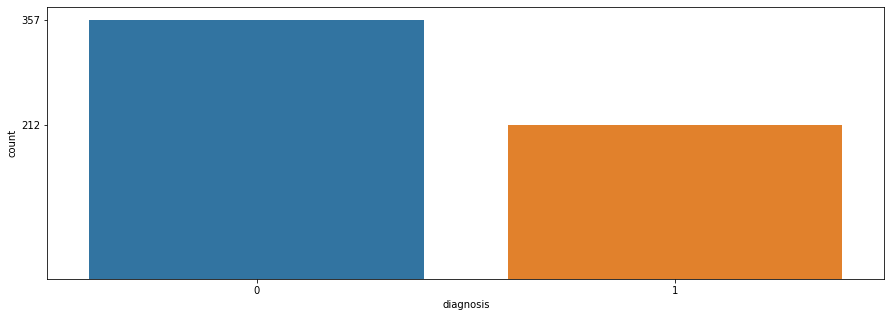

In [ ]:
#  Visualiztion of Output by using countplot
plt.figure(figsize=(15,5))
sns.countplot(data=new_df,x='diagnosis') 
plt.yticks(new_df['diagnosis'].value_counts())
plt.show()

In [ ]:
# Checking of output data in figures
pd.Series(y_train).value_counts()


NameError: ignored

In [ ]:
pd.Series(y_test).value_counts()

0    67
1    47
Name: diagnosis, dtype: int64

In [ ]:
# by looking above two table its clearly indicating that output data is imbalance.
# here we need to balance output data,for this we have two methods:
# 1] Randomoversampling
# 2] Randomundersampling
# Here we will apply RandomOverSampling
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
x_train_sample,y_train_sample=ros.fit_resample(x_train,y_train)
x_test_sample,y_test_sample=ros.fit_resample(x_test,y_test)

In [ ]:
# Verifying sampling metod apply or not
pd.Series(y_train_sample).value_counts()

1    290
0    290
dtype: int64

In [ ]:
pd.Series(y_test_sample).value_counts()

1    67
0    67
dtype: int64

# Training of Model

In [ ]:
# Create user define function
def create_model(model):
  model.fit(x_train_sample,y_train_sample)
  y_pred=model.predict(x_test_sample)
  print(classification_report(y_test_sample,y_pred))
  print(confusion_matrix(y_test_sample,y_pred))
  return model

# 1] Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
lr=LogisticRegression()
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.94      0.97      0.96        67

    accuracy                           0.96       134
   macro avg       0.96      0.96      0.96       134
weighted avg       0.96      0.96      0.96       134

[[63  4]
 [ 2 65]]


In [ ]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(estimator=lr,X=x_train_sample,y=y_train_sample,cv=5)
print("Accuracy is:",accuracy.mean()*100)

Accuracy is: 97.58620689655173


# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(n_estimators=100,max_features=20,random_state=0)
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        67
           1       0.96      0.99      0.97        67

    accuracy                           0.97       134
   macro avg       0.97      0.97      0.97       134
weighted avg       0.97      0.97      0.97       134

[[64  3]
 [ 1 66]]


# Cross_validation

In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
accuracy=cross_val_score(estimator=rfc,X=x_train_sample,y=y_train_sample,cv=5)
print("Accuracy is:",accuracy.mean()*100)

Accuracy is: 97.41379310344827


# Hyper Tuning Parameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param={'penalty':['l1','l2','elasticnet','none'],
       'C':[0.25,0.5,0.75,1.0,1.25,1.50,1.75,2.0],
       'solver':['newton-cg','lbfgs','liblinear','sag','saga'], 
       
}

In [ ]:
RSC=RandomizedSearchCV(estimator=lr,param_distributions=param,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
RSC.fit(x_train_sample,y_train_sample)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5,
                                              1.75, 2.0],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
        

In [ ]:
RSC.best_estimator_

LogisticRegression(C=1.75, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
RSC.best_params_

{'C': 1.75, 'penalty': 'l2', 'solver': 'sag'}

# FINAL MODEL

In [ ]:
lr2=LogisticRegression(C=1.75, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr2=create_model(lr)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.94      0.97      0.96        67

    accuracy                           0.96       134
   macro avg       0.96      0.96      0.96       134
weighted avg       0.96      0.96      0.96       134

[[63  4]
 [ 2 65]]
